# MS DHONI ONE DAY INTERNATIONALS (ODI) RECORD ANALYSIS

In [4]:
#Importing essential libraries and packeges
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Reading the dataset
df=pd.read_excel("C:\\Users\\Lenovo\\Desktop\\MS DHONI ODI\\MS_Dhoni_ODI_record.xlsx")

In [63]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236


In [64]:
# Creating a feature for match year
df['year']=df['date'].dt.year.astype(int)

In [65]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


In [66]:
# Creating a feature for being not out
df['score'] = df['score'].apply(str)
df['not_out']=np.where(df['score'].str.endswith('*'),1,0)

In [67]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [68]:
# Dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number',inplace=True)

In [69]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,2019,0


In [70]:
# Droping those innings where Dhoni did not bat and storing in a New DataFrame
df_new=df.loc[((df['score']!='DNB') & (df['score']!='TDNB')),'runs_scored':]

In [71]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,2019,0


In [72]:
# Fixing the data types of numerical columns
df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']-df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)

In [73]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,2019,0


# Career Statistics

In [58]:
# First match
first_match_date=df['date'].dt.date.min().strftime('%B %d,%Y')
print('First match:',first_match_date)

# Last match
last_match_date=df['date'].dt.date.max().strftime('%B %d,%Y')
print('Last match:',last_match_date)

# Number of matches played in career
number_of_matches=df.shape[0]
print('Number of matches played:',number_of_matches)

# Number of innings
number_of_innings = df_new.shape[0]
print('Number of innings played:', number_of_innings)

# Number of not outs in career
number_of_not_outs=df_new['not_out'].sum()
print('Number of not outs:',number_of_not_outs)

# Runs scored in career
runs_scored_in_career=df_new['runs_scored'].sum()
print('Runs scored in career:',runs_scored_in_career)

# Balls faced in career
balls_faced_in_career = df_new['balls_faced'].sum()
print('Balls faced in career:',balls_faced_in_career)

# Career Strike Rate
career_sr = (runs_scored / balls_faced)*100 
print('Career Strike Rate: {:.2f}'.format(career_sr))


# Career Average
career_avg = (runs_scored / (number_of_inns - not_outs)) 
print('Career Average: {:.2f}'.format(career_avg))

# Highest score
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
highest_score = df.loc[df.date == highest_score_date, 'score'].values[0] 
print('Highest score in career:', highest_score)

# Number of 100s
hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] 
print('Number of 100s in career:', hundreds)

# Number of 50s
fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] 
print('Number of 50s in career:', fifties)

# Number of fours in career
fours = df_new['fours'].sum() 
print('Number of 4s in career:', fours)

# Number of sixes in career
sixes = df_new['sixes'].sum() 
print('Number of 6s in career:', sixes)

First match: December 23,2004
Last match: July 09,2019
Number of matches played: 350
Number of innings played: 297
Number of not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career Strike Rate: 87.56
Career Average: 50.58
Highest score in career: 183*
Number of 100s in career: 10
Number of 50s in career: 73
Number of 4s in career: 826
Number of 6s in career: 229


# Analysis


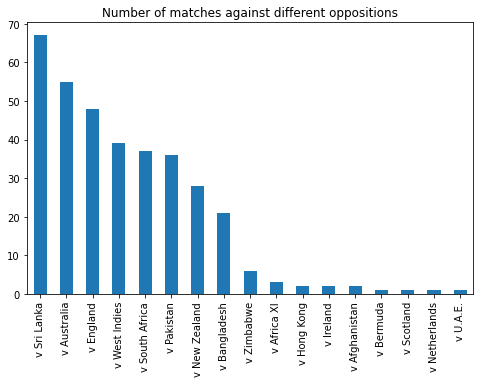

In [74]:
# number of matches played against different oppositions
df['opposition'].value_counts().plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5));

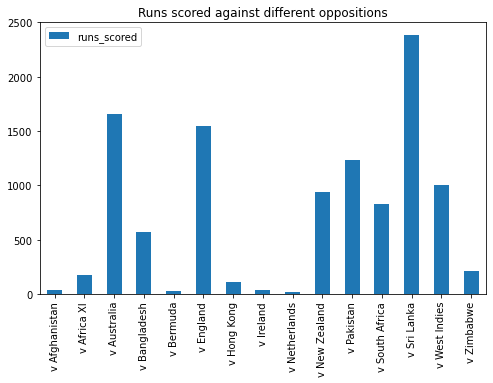

In [75]:
runs_scored_by_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
runs_scored_by_opposition.plot(kind='bar', title='Runs scored against different oppositions', figsize=(8, 5))
plt.xlabel(None);

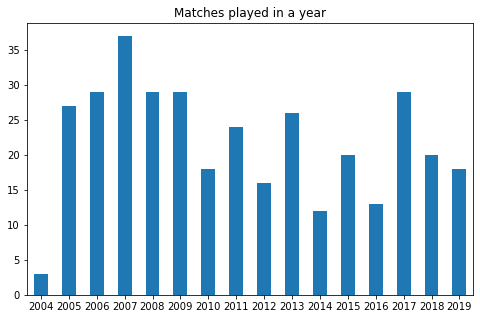

In [146]:
df['year'].value_counts().sort_index().plot(kind='bar', title='Matches played in a year', figsize=(8, 5))
plt.xticks(rotation=0);

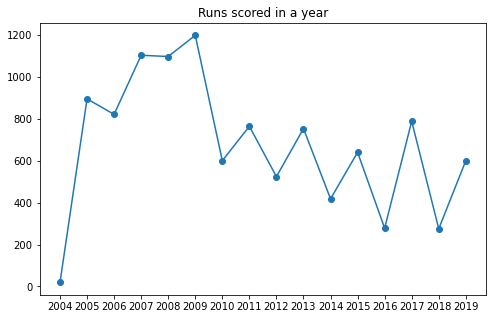

In [147]:
df_new.groupby('year')['runs_scored'].sum().plot(kind='line', marker='o', title='Runs scored in a year', figsize=(8, 5))
years = df['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None);

In [127]:
df_new.reset_index(drop=True, inplace=True)
career_average = pd.DataFrame()
career_average['runs_scored_in_career'] = df_new['runs_scored'].cumsum()
career_average['innings'] = df_new.index.tolist()
career_average['innings'] = career_average['innings'].apply(lambda x: x+1)
career_average['not_outs_in_career'] = df_new['not_out'].cumsum()
career_average['eff_num_of_inns'] = career_average['innings'] - career_average['not_outs_in_career']
career_average['average'] = career_average['runs_scored_in_career'] / career_average['eff_num_of_inns']

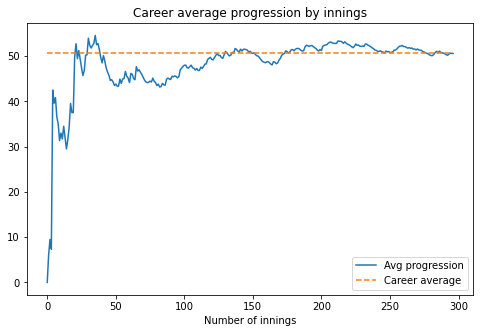

In [128]:
plt.figure(figsize = (8, 5))
plt.plot(career_average['average'])
plt.plot([career_avg]*career_average.shape[0], '--')
plt.title('Career average progression by innings')
plt.xlabel('Number of innings')
plt.legend(['Avg progression', 'Career average']);

# Thank You